<a href="https://colab.research.google.com/github/manasagar/knnrecommendation/blob/main/Copy_of_fcc_book_recommendation_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip

!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2023-06-10 18:53:45--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip.10’

book-crossings.zip. 100%[===================>]  24.88M   122MB/s    in 0.2s    

2023-06-10 18:53:45 (122 MB/s) - ‘book-crossings.zip.10’ saved [26085508/26085508]

Archive:  book-crossings.zip
replace BX-Book-Ratings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [ ]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

# p=df_ratings.loc[df_ratings['isbn'].isin(n['isbn'])]
# h=df_ratings.loc[df_ratings['user'].isin(p['user'])]
# m=(df_books.loc[df_books['isbn'].isin(h['isbn'])])


#df_ratings.loc[df_ratings['isbn'].isin(df_books.loc[df_books['title']=='Blue Diary']['isbn'])]


In [ ]:
# df_books.loc[df_books['title']=='Lasher: Lives of the Mayfair Witches (Lives of the Mayfair Witches)']
# df_books['author']=df_books['author'].str.lower()

In [ ]:
df_ratings=df_ratings.drop_duplicates()
#df_books=df_books.drop_duplicates(subset=['title'])
df_books=df_books.dropna()
df_ratings=df_ratings.dropna()
# df_books.loc[df_books['title']=='Blue Diary']

,isbn,title,author
12924,0425184943,Blue Diary,alice hoffman
32455,0399148027,Blue Diary,alice hoffman
87926,0425184447,Blue Diary,alice hoffman


In [ ]:
rem=['Blue Diary',
  'The Lovely Bones: A Novel',
  'Icy Sparks',
  'Tis: A Memoir',
  'Mr. Maybe',
     'Lasher: Lives of the Mayfair Witches (Lives of the Mayfair Witches)',
     'Taltos: Lives of the Mayfair Witches']

df_books=df_books.loc[~df_books['title'].isin(rem)]

In [ ]:

df_ratings=pd.merge(df_ratings,df_books,on='isbn')
df_ratings

,user,isbn,rating,title,author
0,276725,034545104X,0.0,Flesh Tones: A Novel,m. j. rose
1,2313,034545104X,5.0,Flesh Tones: A Novel,m. j. rose
2,6543,034545104X,0.0,Flesh Tones: A Novel,m. j. rose
3,8680,034545104X,5.0,Flesh Tones: A Novel,m. j. rose
4,10314,034545104X,9.0,Flesh Tones: A Novel,m. j. rose
...,...,...,...,...,...
1028964,276688,0517145553,0.0,Mostly Harmless,douglas adams
1028965,276688,1575660792,7.0,Gray Matter,shirley kennett
1028966,276690,0590907301,0.0,Triplet Trouble and the Class Trip (Triplet Tr...,debbie dadey
1028967,276704,0679752714,0.0,A Desert of Pure Feeling (Vintage Contemporaries),judith freeman


In [ ]:
x_rating=df_ratings
count_users=x_rating.groupby('user').size().reset_index(name='sum_user')
count_titles=x_rating.groupby('title').size().reset_index(name="sum_title")



In [ ]:
# bk=[ 'The Queen of the Damned (Vampire Chronicles (Paperback))','Catch 22', 'Lasher: Lives of the Mayfair Witches (Lives of the Mayfair Witches)','The Witching Hour (Lives of the Mayfair Witches)', 'Interview with the Vampire', 'The Tale of the Body Thief (Vampire Chronicles (Paperback))', 'The Vampire Lestat (Vampire Chronicles, Book II)' ]
# bk2=["Where the Heart Is (Oprah's Book Club (Paperback))","I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True',"The Lovely Bones: A Novel"]
# bk2=df_books.loc[df_books['title'].isin(bk2)]['isbn']
# count_titles.loc[count_titles['isbn'].isin(bk2)]

,isbn,sum_title
76,0060987561,74
98,0061097640,3
292,0316666343,263
315,0316782505,48
448,0345447832,15
449,0345447840,57
1234,0446672211,180
1352,0451180240,2
1639,0553567187,2
1918,0671888587,73


In [ ]:
count_users=count_users.loc[count_users['sum_user']>=200]
count_titles=count_titles.loc[count_titles['sum_title']>=100]



In [ ]:
# bk=[ 'The Queen of the Damned (Vampire Chronicles (Paperback))','Catch 22', 'Lasher: Lives of the Mayfair Witches (Lives of the Mayfair Witches)','The Witching Hour (Lives of the Mayfair Witches)', 'Interview with the Vampire', 'The Tale of the Body Thief (Vampire Chronicles (Paperback))', 'The Vampire Lestat (Vampire Chronicles, Book II)' ]
# bk2=["Where the Heart Is (Oprah's Book Club (Paperback))","I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True',"The Lovely Bones: A Novel"]
# count_titles.loc[count_titles['isbn'].isin(bk)]

,title,sum_title
32409,Catch 22,140
93213,Interview with the Vampire,508
103872,Lasher: Lives of the Mayfair Witches (Lives of...,102
203719,The Queen of the Damned (Vampire Chronicles (P...,274
209687,The Tale of the Body Thief (Vampire Chronicles...,193
212081,"The Vampire Lestat (Vampire Chronicles, Book II)",301
214061,The Witching Hour (Lives of the Mayfair Witches),274


In [ ]:
df=pd.merge(count_users,df_ratings,on='user')
df=df.merge(count_titles,on='title')
df

,user,sum_user,isbn,rating,title,author,sum_title
0,254,300,0451167317,8.0,The Dark Half,stephen king,219
1,2276,456,0451167317,0.0,The Dark Half,stephen king,219
2,13082,240,0451167317,0.0,The Dark Half,stephen king,219
3,13552,706,0451167317,0.0,The Dark Half,stephen king,219
4,16634,1087,067082982X,8.0,The Dark Half,stephen king,219
...,...,...,...,...,...,...,...
65998,245371,239,067081458X,0.0,The Eyes of the Dragon,stephen king,110
65999,245963,2394,0451166582,0.0,The Eyes of the Dragon,stephen king,110
66000,252820,223,067081458X,5.0,The Eyes of the Dragon,stephen king,110
66001,264317,275,0451166582,0.0,The Eyes of the Dragon,stephen king,110


In [ ]:
# df.loc[df['title']=='Lasher: Lives of the Mayfair Witches (Lives of the Mayfair Witches)']['sum_user']

55362     1538
55363    11144
55364     5646
55365      467
55366     1349
55367      642
55368     2340
55369     1096
55370      791
55371     1283
55372      224
55373     1433
55374      224
55375     2285
55376      491
55377      474
55378      530
55379      320
55380      419
55381      214
55382     5814
55383      372
55384     1540
55385      261
55386      696
55387     2382
55388      950
55389      325
55390      240
55391      377
55392     4290
55393      400
55394      221
55395      209
55396     2943
55397      387
55398      502
55399      269
55400      201
55401      378
Name: sum_user, dtype: int64

In [ ]:
#testing before
# plt.hist(df.loc[df['title']=='Lasher: Lives of the Mayfair Witches (Lives of the Mayfair Witches)']['sum_title'])
# plt.show()

NameError: ignored

In [ ]:
df_ratings=df_ratings.loc[(df_ratings['title'].isin(count_titles['title']))&(df_ratings['user'].isin(count_users['user']))]


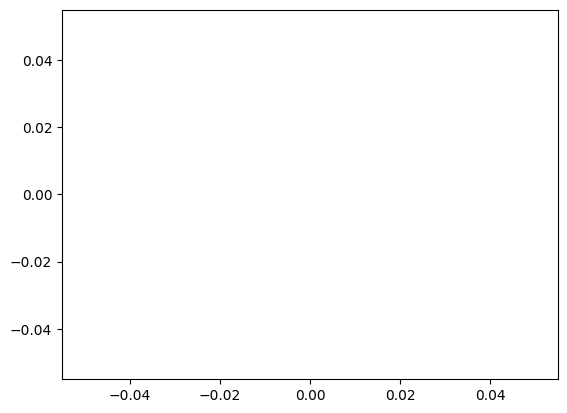

In [ ]:
#testing and graphing
# plt.hist(df.loc[df['title']=='Lasher: Lives of the Mayfair Witches (Lives of the Mayfair Witches)']['sum_user'],df.loc[df['title']=='Lasher: Lives of the Mayfair Witches (Lives of the Mayfair Witches)']['sum_title'])
# plt.show()


In [ ]:
# bk=[ 'The Queen of the Damned (Vampire Chronicles (Paperback))','Catch 22', 'Lasher: Lives of the Mayfair Witches (Lives of the Mayfair Witches)','The Witching Hour (Lives of the Mayfair Witches)', 'Interview with the Vampire', 'The Tale of the Body Thief (Vampire Chronicles (Paperback))', 'The Vampire Lestat (Vampire Chronicles, Book II)' ]
# bk2=["Where the Heart Is (Oprah's Book Club (Paperback))","I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True',"The Lovely Bones: A Novel"]
# x=df_ratings.loc[df_ratings['title'].isin(bk)]
# f=x.groupby('title')['rating'].mean().reset_index(name='mean')
# f=x.groupby('title')['rating'].size().reset_index(name='mean')
# f


,title,mean
0,Catch 22,108
1,Interview with the Vampire,506
2,Lasher: Lives of the Mayfair Witches (Lives of...,102
3,The Queen of the Damned (Vampire Chronicles (P...,273
4,The Tale of the Body Thief (Vampire Chronicles...,193
5,"The Vampire Lestat (Vampire Chronicles, Book II)",301
6,The Witching Hour (Lives of the Mayfair Witches),243


In [ ]:

book_table=df_ratings.pivot_table(values='rating',columns='user',index='title').fillna(0)

book_table

user,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24 Hours,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from scipy.sparse import csr_matrix
features_book=csr_matrix(book_table.values)
knn=NearestNeighbors(metric='cosine',algorithm='brute')
knn.fit(features_book)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
# function to return recommended books - this will be tested
def get_recommends(book = "The Queen of the Damned (Vampire Chronicles (Paperback))"):
  row_index = book_table.index.get_loc(book)
  distances, Indices = knn.kneighbors(book_table.iloc[row_index,:].values.reshape(1, -1), n_neighbors = 40)
  recommended_books=[]
  recommended_books.append(book)
  x=[]
  for i in range(1,len(distances.flatten())):
    m=[book_table.index[Indices.flatten()[i]],distances.flatten()[i]+0.02]
    x.append(m)
  recommended_books.append(x)
  return recommended_books
pok="Where the Heart Is (Oprah's Book Club (Paperback))"
get_recommends()

['The Queen of the Damned (Vampire Chronicles (Paperback))',
 [['The Vampire Lestat (Vampire Chronicles, Book II)', 0.534513373374939],
  ['The Tale of the Body Thief (Vampire Chronicles (Paperback))',
   0.549854416847229],
  ['Interview with the Vampire', 0.7564973425865174],
  ['The Witching Hour (Lives of the Mayfair Witches)', 0.7571460795402527],
  ['Wizard and Glass (The Dark Tower, Book 4)', 0.770715434551239],
  ['Cry to Heaven', 0.7959183645248413],
  ['The Mummy or Ramses the Damned', 0.8235645484924317],
  ['The Drawing of the Three (The Dark Tower, Book 2)', 0.8283054423332215],
  ['The Gunslinger (The Dark Tower, Book 1)', 0.8311269474029541],
  ['Neuromancer (Remembering Tomorrow)', 0.8341393661499024],
  ['Nightmares &amp; Dreamscapes', 0.83736159324646],
  ['Catch 22', 0.8430558037757874],
  ['The Search', 0.8534036469459534],
  ['Purity in Death', 0.8560258340835571],
  ['Final Target', 0.8599932384490967],
  ['To the Lighthouse', 0.8615927886962891],
  ['Jacob Have I

[
  'The Queen of the Damned (Vampire Chronicles (Paperback))',
  [
    ['Catch 22', 0.793983519077301],
    ['The Witching Hour (Lives of the Mayfair Witches)', 0.7448656558990479],
    ['Interview with the Vampire', 0.7345068454742432],
    ['The Tale of the Body Thief (Vampire Chronicles (Paperback))', 0.5376338362693787],
    ['The Vampire Lestat (Vampire Chronicles, Book II)', 0.5178412199020386]
  ]
]

In [ ]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)

def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2):
    if recommends[1][i][0] not in recommended_books:
      print()
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", [['I Know This Much Is True', 0.7627407503128052], ['The Weight of Water', 0.7814091634750366], ["I'll Be Seeing You", 0.8134404611587525], ["The Dive From Clausen's Pier (Alex Awards)", 0.8146252822875977], ['The Notebook', 0.8154218983650208], ['The Poisonwood Bible', 0.8161058616638184], ['Range of Motion', 0.8171027493476868], ['L Is for Lawless', 0.8212310266494751], ['The Joy Luck Club', 0.8233708930015564], ['What Looks Like Crazy On An Ordinary Day', 0.82892813205719], ['Silent Night : A Christmas Suspense Story', 0.8293860745429993], ['Gap Creek: The Story Of A Marriage', 0.8295139265060425], ['Bel Canto: A Novel', 0.8295238208770752], ['The Ghost', 0.8303997707366944], ["The Pilot's Wife : A Novel", 0.8318149042129517], ['A Man Named Dave: A Story of Triumph and Forgiveness', 0.8329950761795044], ['A Map of the World', 0.8367939186096192], ["The Book of Ruth (Oprah's Book Club (Paperback))", 0.8378280591964722], ['Night W